In [9]:
import sklearn

In [2]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [11]:
np.random.seed(0)
from sklearn.datasets import make_moons, make_circles, make_classification

In [12]:
X, y = make_moons(200, noise=0.20)

In [14]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [16]:
X.shape

(200, 2)

In [17]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [18]:
%matplotlib

Using matplotlib backend: Qt4Agg


In [19]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [32]:
count=0
for s in X[: ,0]:        
    if count > len(X[ : ,0]):
        break
    print s , X[ : ,1][count]
    print "------------------------------------------------------------------"
    print X[count]
    if sorted(X[count]) == sorted([ s , X[ : ,1][count]]):
        print "balee"
    count= count+1

0.743461176196 0.464656328377
------------------------------------------------------------------
[ 0.74346118  0.46465633]
balee
1.65755661779 -0.632031569098
------------------------------------------------------------------
[ 1.65755662 -0.63203157]
balee
-0.158788747932 0.255844647136
------------------------------------------------------------------
[-0.15878875  0.25584465]
balee
-1.08875199838 -0.396943153948
------------------------------------------------------------------
[-1.088752   -0.39694315]
balee
1.76805199655 -0.254432127061
------------------------------------------------------------------
[ 1.768052   -0.25443213]
balee
1.95416454349 -0.128505793878
------------------------------------------------------------------
[ 1.95416454 -0.12850579]
balee
0.936945369302 0.36597075346
------------------------------------------------------------------
[ 0.93694537  0.36597075]
balee
0.884465894952 -0.475954006526
-----------------------------------------------------------------

In [33]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


In [34]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [35]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [36]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

In [38]:
def plot_decision_boundary(pred_func):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068926
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Loss after iteration 0: 0.418627
Loss after iteration 1000: 0.046520
Loss after iteration 2000: 0.043340
Loss after iteration 3000: 0.041303
Loss after iteration 4000: 0.039900
Loss after iteration 5000: 0.038971
Loss after iteration 6000: 0.038373
Loss after iteration 7000: 0.037989
Loss after iteration 8000: 0.037739
Loss after iteration 9000: 0.037574
Loss after iteration 10000: 0.037463
Loss after iteration 11000: 0.037387
Loss after iteration 12000: 0.037334
Loss after iteration 13000: 0.037296
Loss after iteration 14000: 0.037269
Loss after iteration 15000: 0.037250
Loss after iteration 16000: 0.037236
Loss after iteration 17000: 0.037225
Loss after iteration 18000: 0.037218
Loss after iteration 19000: 0.037212


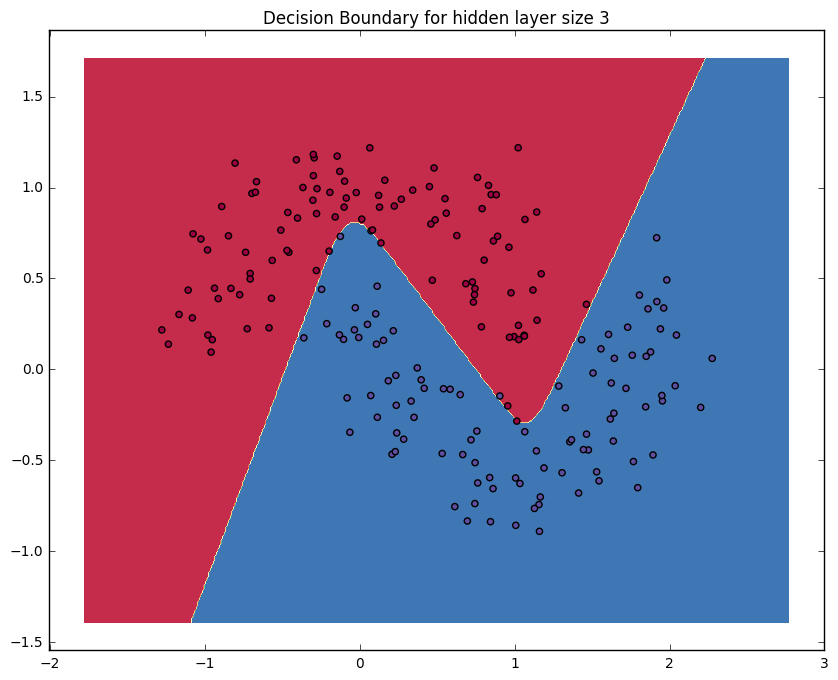

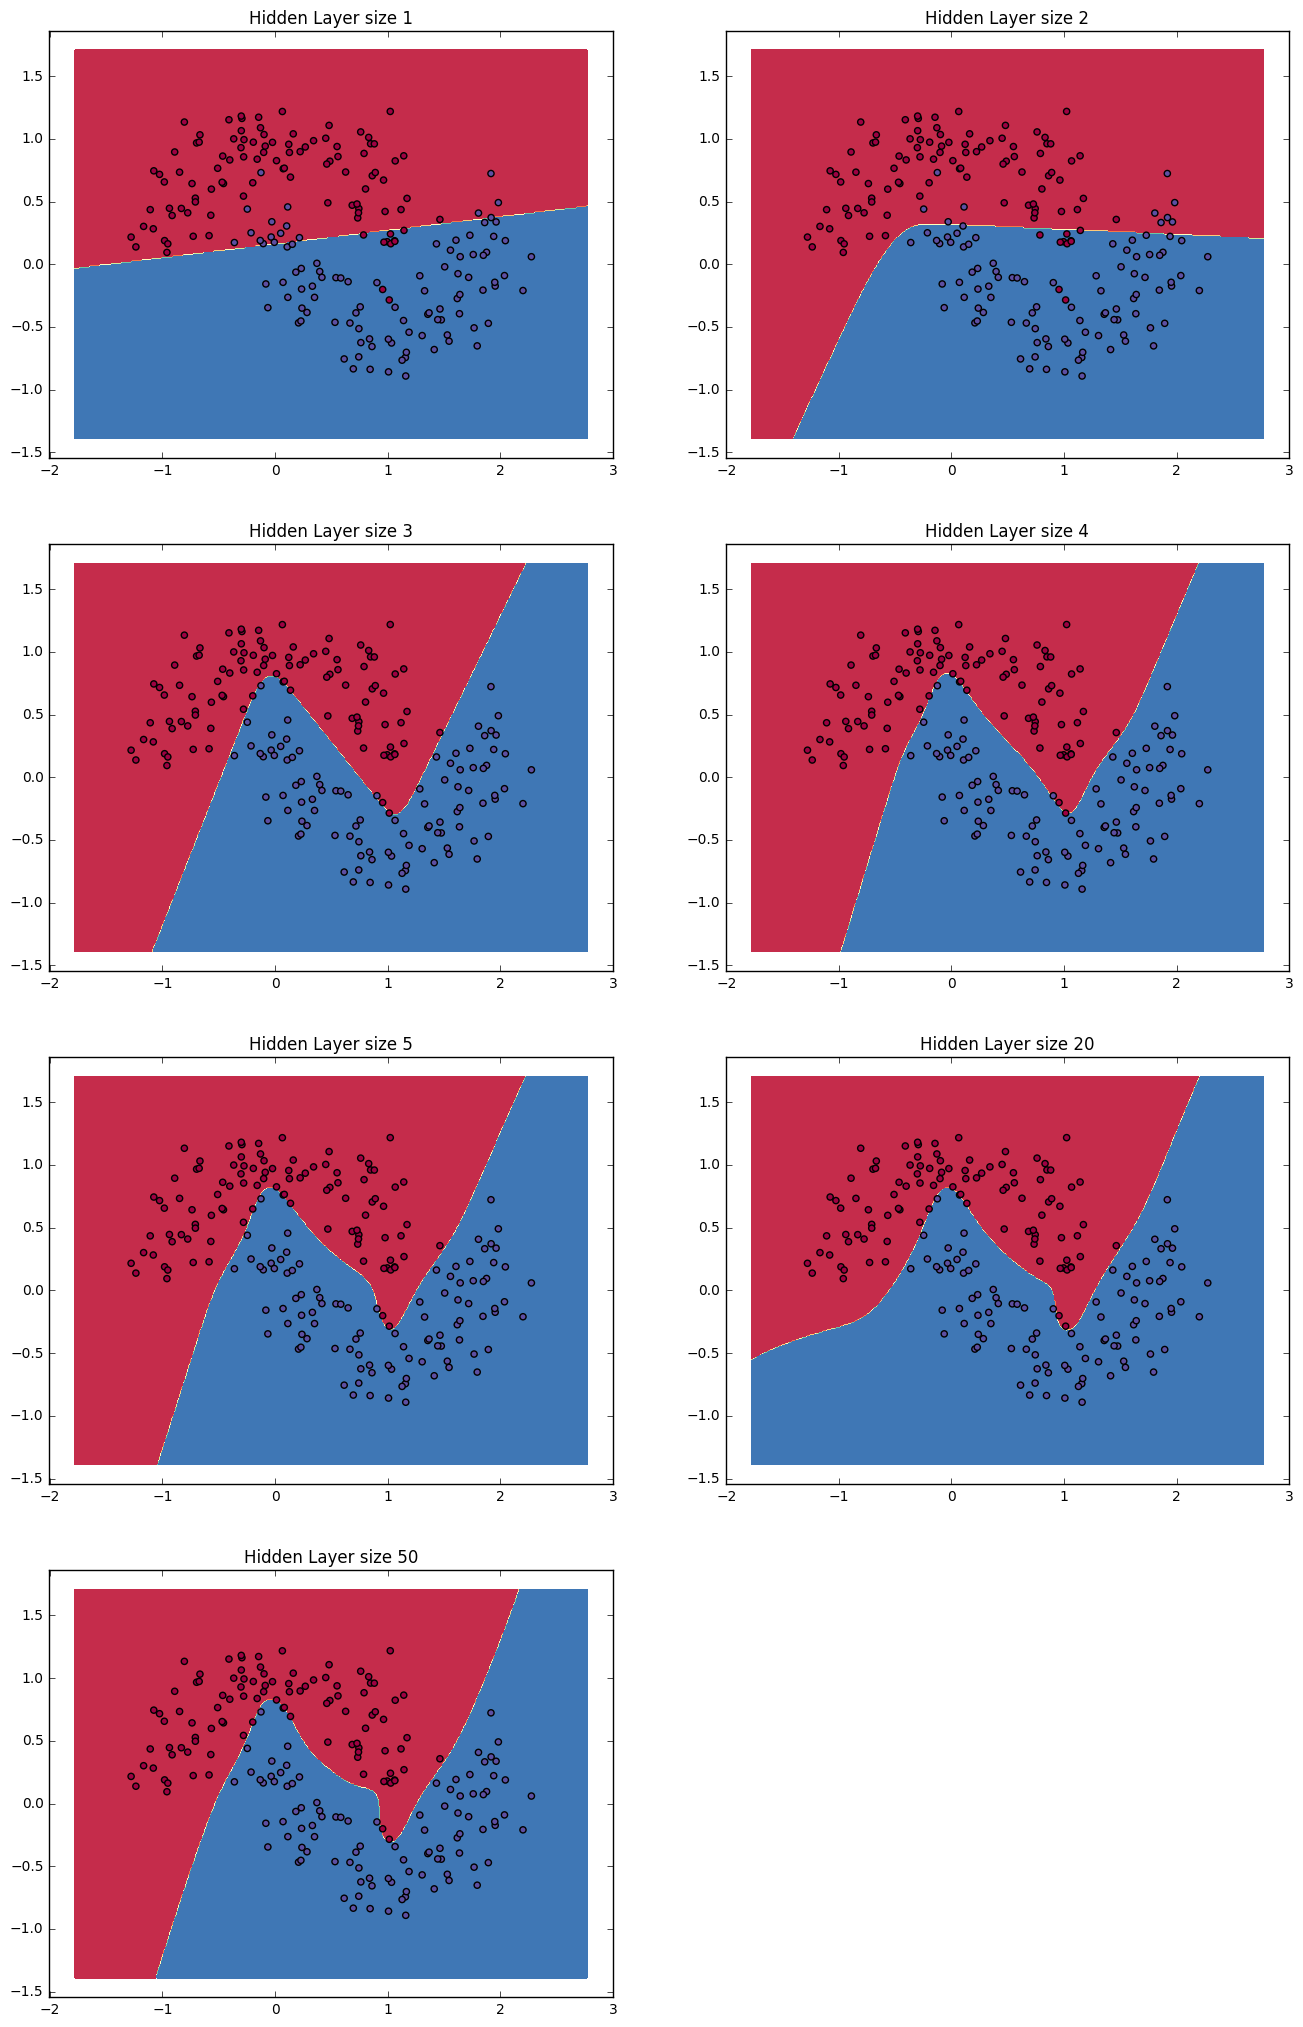

In [39]:
# Package imports 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib 
 
# Display plots inline and change default figure size 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
 
# %% 2 
np.random.seed(3) 
X, y = sklearn.datasets.make_moons(200, noise=0.20) 
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral) 
 
# %% 3 
# Train the logistic rgeression classifier 
clf = sklearn.linear_model.LogisticRegressionCV() 
clf.fit(X, y) 
 
# %% 4 
# Helper function to plot a decision boundary. 
# If you don't fully understand this function don't worry, it just generates the contour plot below. 
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 
 
# %% 12 
# Plot the decision boundary 
plot_decision_boundary(lambda x: clf.predict(x)) 
plt.title("Logistic Regression") 
 
# %% 15 
num_examples = len(X) # training set size 
nn_input_dim = 2 # input layer dimensionality 
nn_output_dim = 2 # output layer dimensionality 
 
# Gradient descent parameters (I picked these by hand) 
epsilon = 0.01 # learning rate for gradient descent 
reg_lambda = 0.01 # regularization strength 
 
# %% 7 
# Helper function to evaluate the total loss on the dataset 
def calculate_loss(model): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation to calculate our predictions 
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Calculating the loss 
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs) 
    # Add regulatization term to loss (optional) 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) 
    return 1./num_examples * data_loss 
 
# %% 8 
# Helper function to predict an output (0 or 1) 
def predict(model, x): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation 
    z1 = x.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1) 
 
# %% 16 
# This function learns parameters for the neural network and returns the model. 
# - nn_hdim: Number of nodes in the hidden layer 
# - num_passes: Number of passes through the training data for gradient descent 
# - print_loss: If True, print the loss every 1000 iterations 
def build_model(nn_hdim, num_passes=20000, print_loss=False): 
 
    # Initialize the parameters to random values. We need to learn these. 
    np.random.seed(0) 
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, nn_output_dim)) 
 
    # This is what we return at the end 
    model = {} 
 
    # Gradient descent. For each batch... 
    for i in range(0, num_passes): 
 
        # Forward propagation 
        z1 = X.dot(W1) + b1 
        a1 = np.tanh(z1) 
        z2 = a1.dot(W2) + b2 
        exp_scores = np.exp(z2) 
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
 
        # Backpropagation 
        delta3 = probs 
        delta3[range(num_examples), y] -= 1 
        dW2 = (a1.T).dot(delta3) 
        db2 = np.sum(delta3, axis=0, keepdims=True) 
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
        dW1 = np.dot(X.T, delta2) 
        db1 = np.sum(delta2, axis=0) 
 
        # Add regularization terms (b1 and b2 don't have regularization terms) 
        dW2 += reg_lambda * W2 
        dW1 += reg_lambda * W1 
 
        # Gradient descent parameter update 
        W1 += -epsilon * dW1 
        b1 += -epsilon * db1 
        W2 += -epsilon * dW2 
        b2 += -epsilon * db2 
 
        # Assign new parameters to the model 
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2} 
 
        # Optionally print the loss. 
        # This is expensive because it uses the whole dataset, so we don't want to do it too often. 
        if print_loss and i % 1000 == 0: 
          print("Loss after iteration %i: %f" %(i, calculate_loss(model))) 
 
    return model 
 
# %% 17 
# Build a model with a 3-dimensional hidden layer 
model = build_model(3, print_loss=True) 
 
# Plot the decision boundary 
plot_decision_boundary(lambda x: predict(model, x)) 
plt.title("Decision Boundary for hidden layer size 3") 
 
# %% 14 
plt.figure(figsize=(16, 32)) 
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50] 
for i, nn_hdim in enumerate(hidden_layer_dimensions): 
    plt.subplot(5, 2, i+1) 
    plt.title('Hidden Layer size %d' % nn_hdim) 
    model = build_model(nn_hdim) 
    plot_decision_boundary(lambda x: predict(model, x)) 
plt.show()


Loss after iteration 0: 0.418627
Loss after iteration 1000: 0.046520
Loss after iteration 2000: 0.043340
Loss after iteration 3000: 0.041303
Loss after iteration 4000: 0.039900
Loss after iteration 5000: 0.038971
Loss after iteration 6000: 0.038373
Loss after iteration 7000: 0.037989
Loss after iteration 8000: 0.037739
Loss after iteration 9000: 0.037574
Loss after iteration 10000: 0.037463
Loss after iteration 11000: 0.037387
Loss after iteration 12000: 0.037334
Loss after iteration 13000: 0.037296
Loss after iteration 14000: 0.037269
Loss after iteration 15000: 0.037250
Loss after iteration 16000: 0.037236
Loss after iteration 17000: 0.037225
Loss after iteration 18000: 0.037218
Loss after iteration 19000: 0.037212


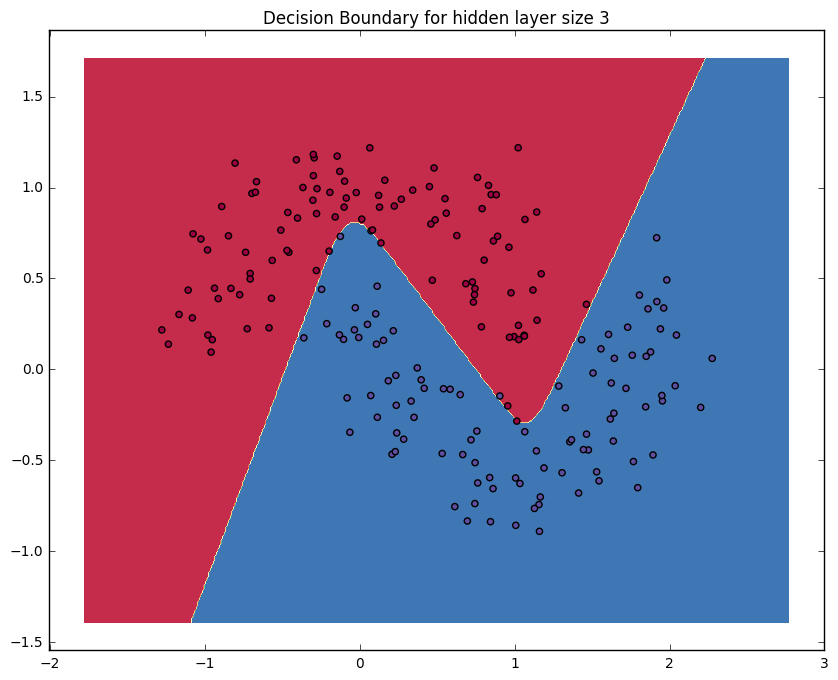

In [40]:
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [41]:
%matplotlib

Using matplotlib backend: Qt4Agg
